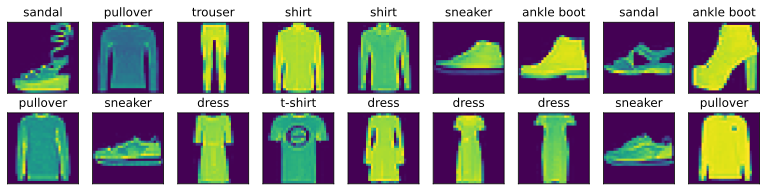

In [3]:
import numpy as np
import d2lnumpy as d2l
from numpytorch.utils.data import DataLoader
from d2lnumpy import load_mnist


d2l.use_svg_display()

mnist_train = load_mnist("dataset", kind='train')
mnist_test = load_mnist("dataset", kind='t10k')


def get_fashion_mnist_labels(labels):  # @save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  # @save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes


X_train, y_train = mnist_train
X_test, y_test = mnist_test

train_iter = DataLoader(X_train, y_train, batch_size=18)
X, y = next(train_iter)
X, y = next(train_iter)
X, y = next(train_iter)
show_images(X.reshape(18, 28, 28), 2, 9,
            titles=get_fashion_mnist_labels(y.reshape(-1)))


def load_data_fashion_mnist(batch_size, path="dataset"):  # @save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    mnist_train = load_mnist(path, kind='train')
    mnist_test = load_mnist(path, kind='t10k')

    return (DataLoader(mnist_train, batch_size, shuffle=True,),
            DataLoader(mnist_test, batch_size, shuffle=False,))